In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

UsageError: Line magic function `%matplotli` not found.


In [2]:
df_index = pd.read_csv("economic_index.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
#drop unnecessay columns
df_index.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)

In [6]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

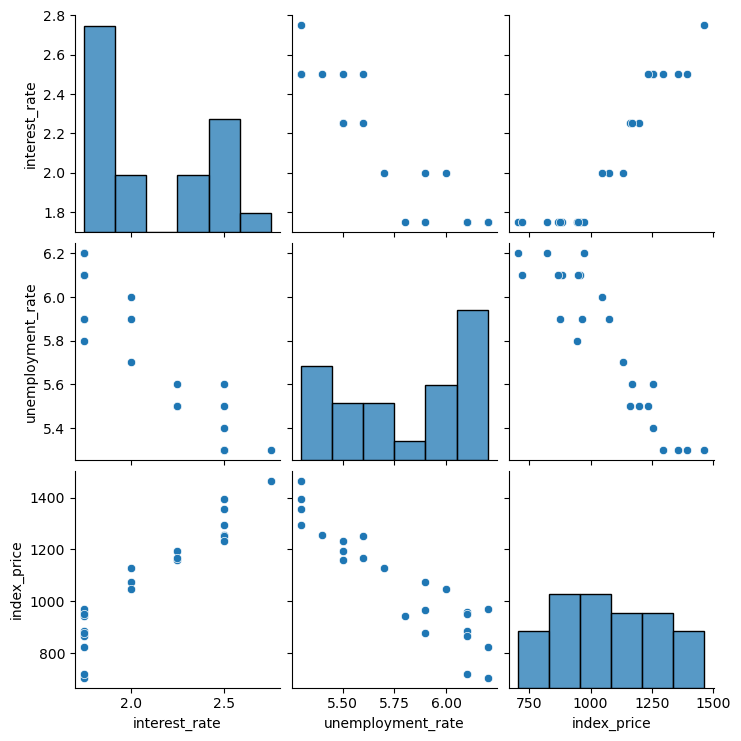

In [8]:
import seaborn as sns
sns.pairplot(df_index)

In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

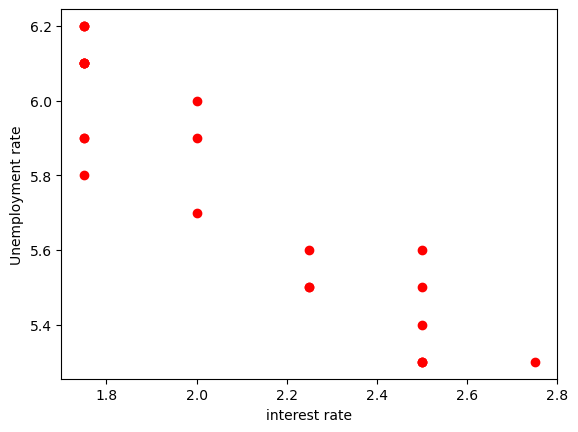

In [12]:
#Visualize the datapoints more closely
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r')
plt.xlabel("interest rate")
plt.ylabel("Unemployment rate")

Text(0, 0.5, 'Index Price')

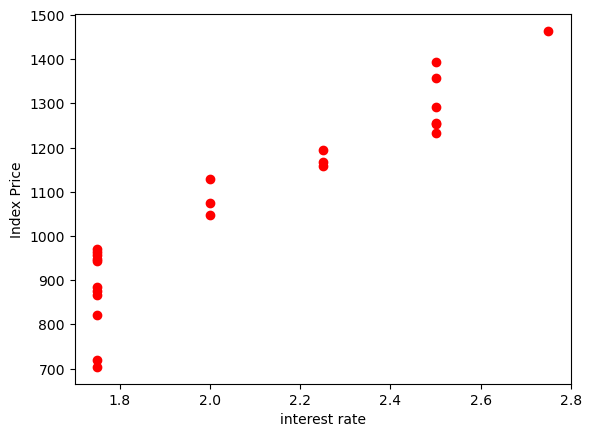

In [13]:
plt.scatter(df_index['interest_rate'], df_index['index_price'], color='r')
plt.xlabel("interest rate")
plt.ylabel("Index Price")

Text(0, 0.5, 'unemployment_rate')

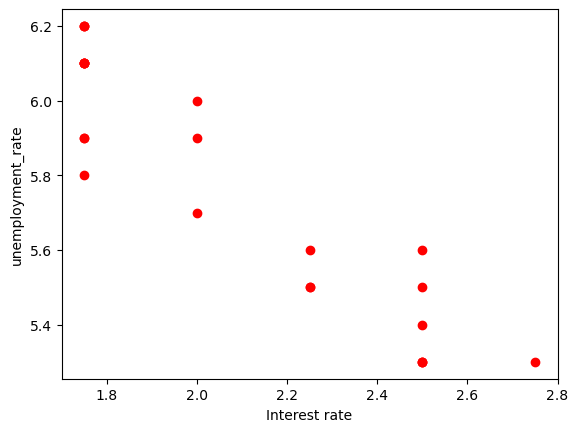

In [16]:
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment_rate")

In [17]:
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [18]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [19]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [31]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

In [22]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

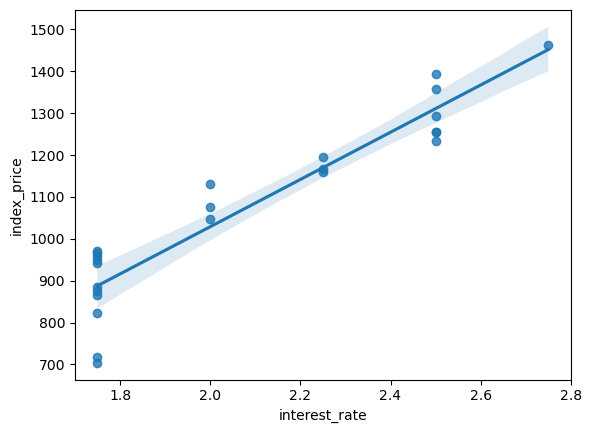

In [25]:
sns.regplot(data=df_index, x='interest_rate', y='index_price')

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

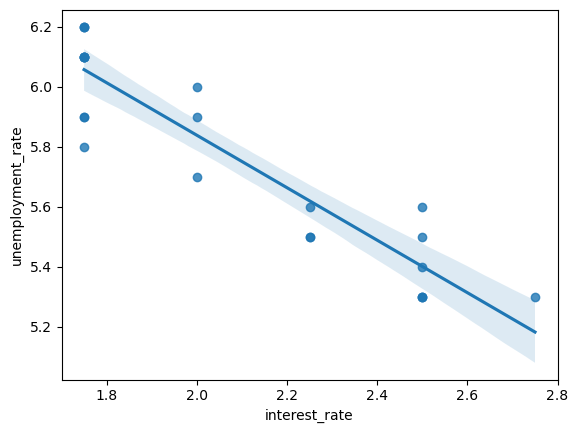

In [26]:
sns.regplot(data=df_index, x='interest_rate', y='unemployment_rate')

<Axes: xlabel='interest_rate', ylabel='index_price'>

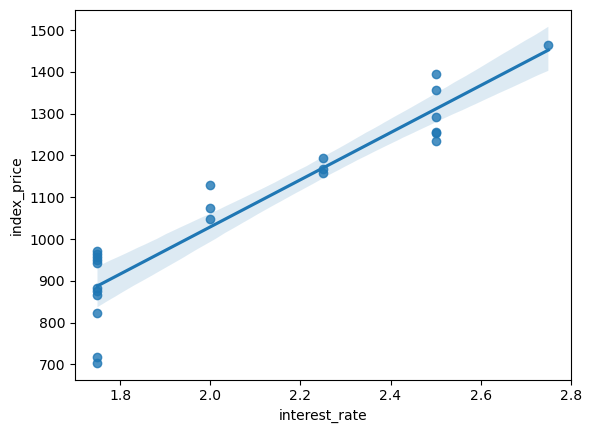

In [28]:
sns.regplot(data=df_index, x='interest_rate', y='index_price')

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [33]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [34]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [35]:
regression.fit(X_train, y_train)

LinearRegression()

In [37]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [38]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [39]:
np.mean(validation_score)

-5914.82818016239

In [40]:
##prediction
y_pred = regression.predict(X_test)

In [41]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [42]:
##Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [44]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)
#display adjusted R-squared
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.7591371539010257
0.5985619231683761


## Assumption

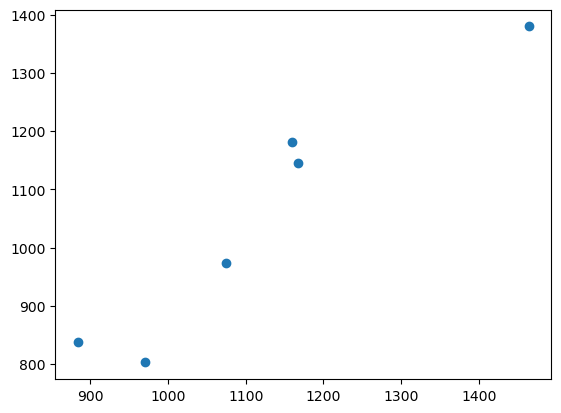

In [46]:
plt.scatter(y_test, y_pred)

In [47]:
residuals = y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


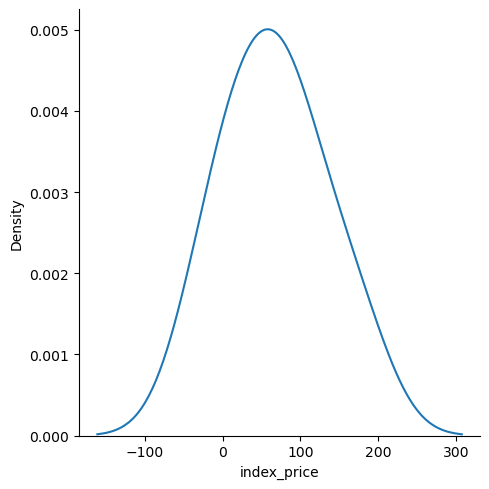

In [48]:
#Plot this residuals
sns.displot(residuals, kind='kde')

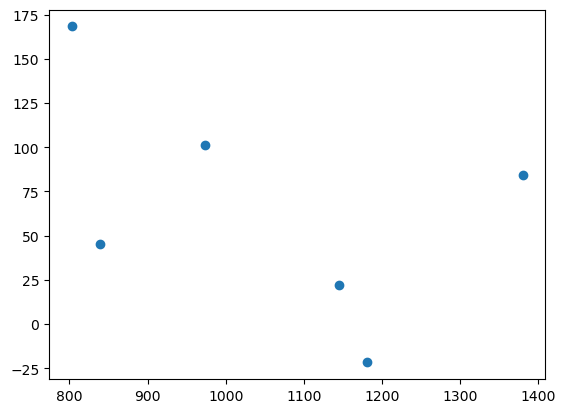

In [49]:
#scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)

In [50]:
import statsmodels.api as sm

In [51]:
model = sm.OLS(y_train, X_train).fit()
prediction = model.predict(X_test)
print(prediction)

[ 127.30223686 -250.70164745  326.390126   -214.91844842  -79.59130481
   91.51903783]


In [52]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 24 Apr 2025   Prob (F-statistic):                       0.754
Time:                        09:48:54   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

d:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [53]:
regression.coef_

array([  88.27275507, -116.25716066])